# Pandas의 시각화 기능

Pandas의 시리즈나 데이터프레임은 `plot`이라는 시각화 메서드를 내장하고 있다. `plot`은 matplotlib를 내부에서 임포트하여 사용한다. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df1.tail()

,A,B,C
2018-04-06,9.396256,6.282026,-11.198087
2018-04-07,10.086074,7.583872,-11.826175
2018-04-08,9.605047,9.887789,-12.886190
2018-04-09,9.469097,11.024680,-12.788465
2018-04-10,10.052051,10.625231,-12.418409


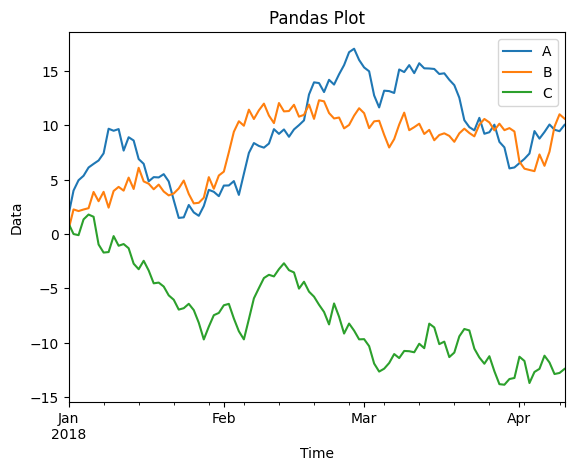

In [12]:
df1.plot()
plt.title("Pandas Plot")
plt.xlabel("Time")
plt.ylabel("Data")
plt.show()

`plot` 메서드의 `kind`라는 인수를 바꾸면 여러가지 플롯을 그릴 수 있다. 다음과 같은 인수값을 지원한다.

* `bar`
* `pie`
* `hist`
* `kde`
* `box`
* `scatter`
* `area`


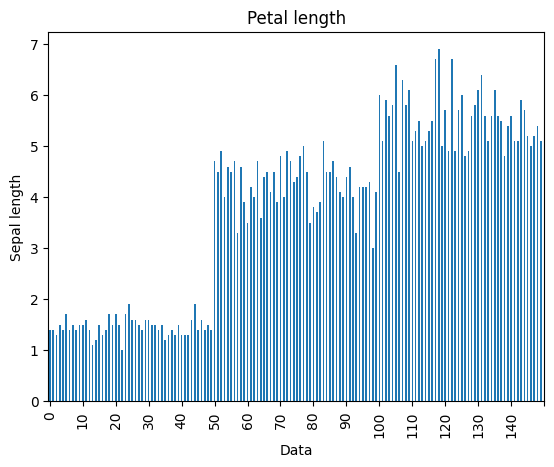

In [19]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터

iris['petal_length'].plot(kind='bar')
plt.title("Petal length")
plt.xlabel("Data")
plt.ylabel("Sepal length")
plt.xticks(np.arange(0, 160, 10))
plt.show()

`kind` 인수에 문자열을 쓰는 대신 `plot.bar`처럼 직접 메서드로 사용할 수도 있다.

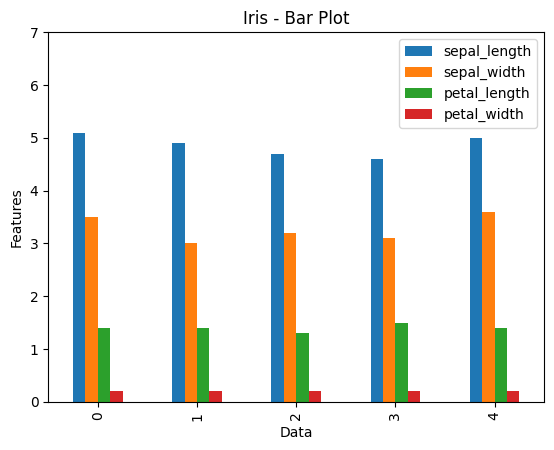

In [22]:
iris[:5].plot.bar()
plt.title("Iris - Bar Plot")
plt.xlabel("Data")
plt.ylabel("Features")
plt.ylim(0, 7)
plt.show()

다음은 그룹분석으로 각 붓꽃종의 특징값의 평균을 구한 것이다.

In [23]:
df2 = iris.groupby('species').mean()
df2.columns.name = "feature"
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


그룹분석 결과도 데이터프레임이므로 같은 방식으로 시각화할 수 있다.

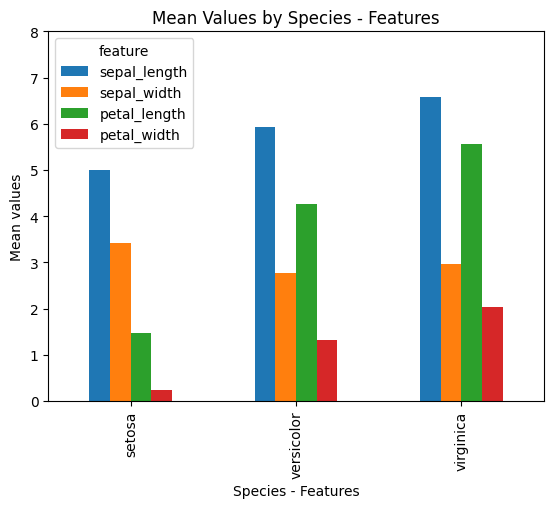

In [27]:
df2.plot.bar()
plt.title("Mean Values by Species - Features")
plt.xlabel("Species - Features")
plt.ylabel("Mean values")
plt.ylim(0, 8)
plt.show()

전치연산으로 시각화 방법을 다르게 할 수도 있다.

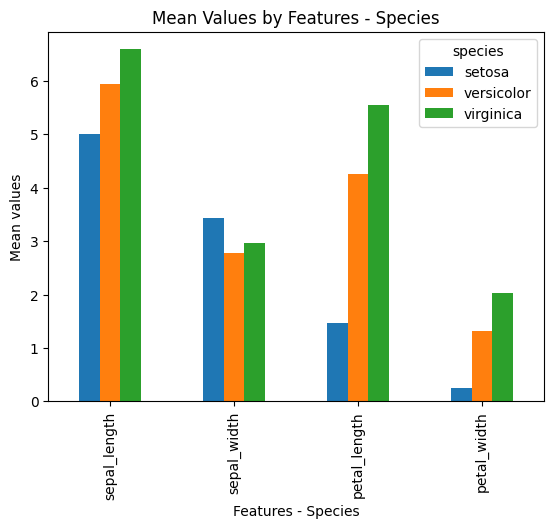

In [31]:
df2.T.plot.bar()
plt.title("Mean Values by Features - Species")
plt.xlabel("Features - Species")
plt.ylabel("Mean values")
plt.show()

다음은 ``pie``,  ``hist``, ``kde``, ``box``, ``scatter`` 플롯 예제이다.

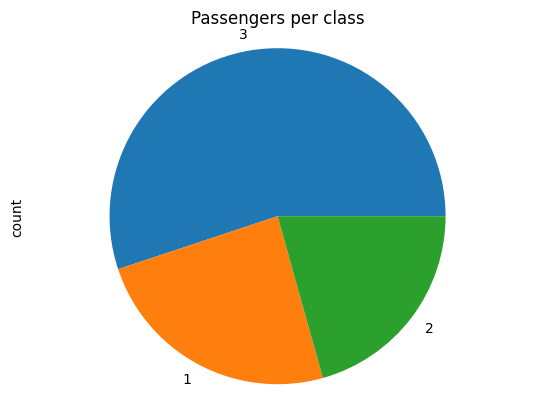

In [33]:
df3 = titanic.pclass.value_counts()
df3.plot.pie()
plt.title("Passengers per class")
plt.axis('equal')
plt.show()

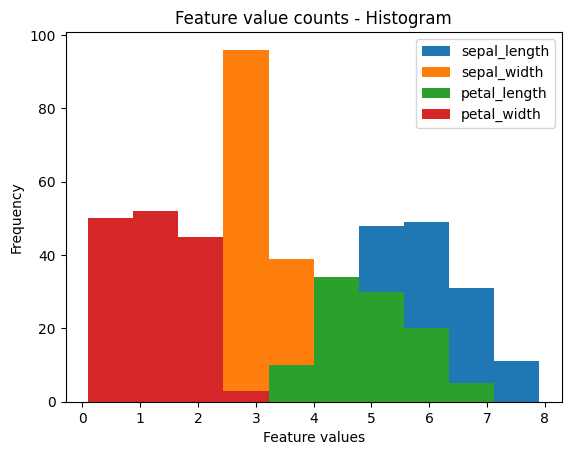

In [43]:
iris.plot.hist()
plt.title("Feature value counts - Histogram")
plt.xlabel("Feature values")
plt.ylabel("Frequency")
plt.show()

In [46]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 6.8 MB/s eta 0:00:0000:0100:01


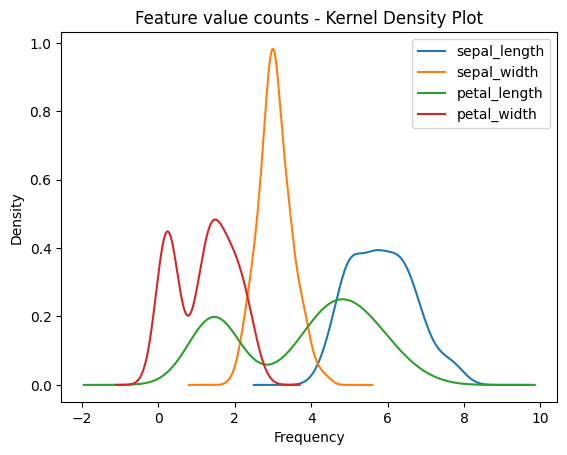

In [47]:
iris.plot.kde()
plt.title("Feature value counts - Kernel Density Plot")
plt.xlabel("Frequency")
plt.show()

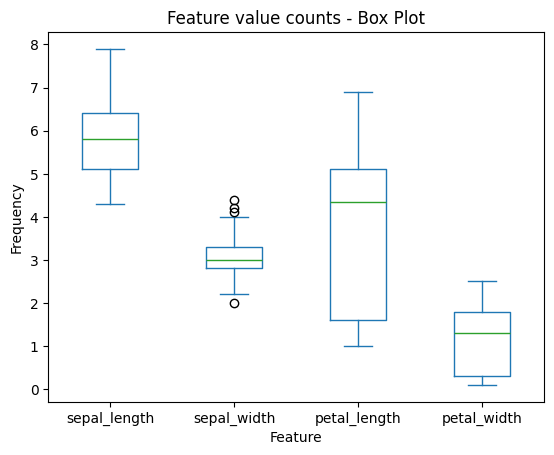

In [48]:
iris.plot.box()
plt.title("Feature value counts - Box Plot")
plt.xlabel("Feature")
plt.ylabel("Frequency")
plt.show()

박스플롯에 대해서는 추가적인 기능을 가진 `boxplot` 명령이 별도로 있다.

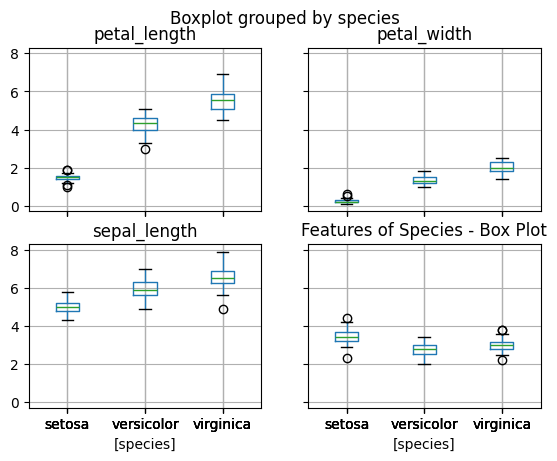

In [55]:
iris.boxplot(by='species')
# plt.tight_layout()?
plt.title("Features of Species - Box Plot")
plt.show()